# Lente puntual

Este notebook se basa en un notebook de Massimo Menegghetti que se puede encontrar en el siguiente GitHub: (https://github.com/maxmen/LensingLectures)

Empezamos con una simulación sencilla utilizando la ecuación de la deflexión del ángulo que hemos obtenido con la aprosimación de lente fina.

$$
\hat\alpha_{GR} \approx \frac{4 G M}{c^2 \xi^2} \vec{\xi}.
$$


En el ejemplo concreto que ponemos a continuación Massimo Meneghetti coloca una lente puntual en el centro de la imagen y calcula la deflexión en unos puntos aleatorios. Adicionalmente, rescala la longitu del vector para que siempre valga 0.1.

time of execution: 0.23677301406860352


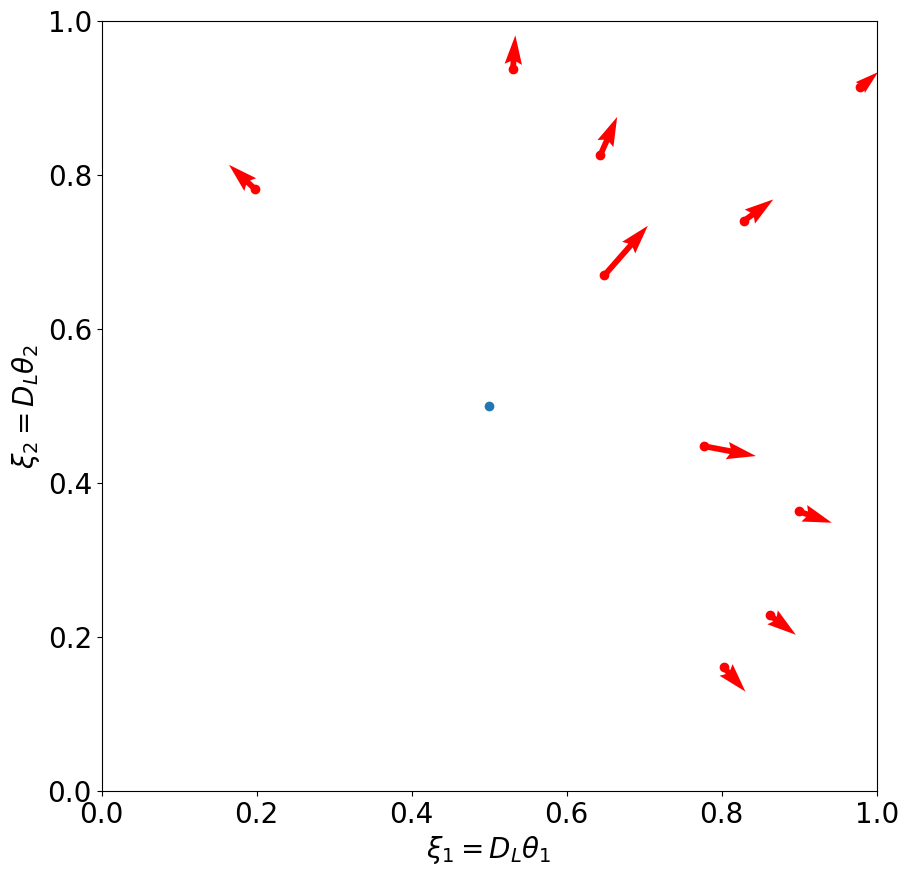

In [3]:
import time
# generate a random distribution of point masses
t1 = time.time()

import numpy.random as rn
import matplotlib.pyplot as plt
import numpy as np
from astropy import constants as const
from astropy import units as u


n=1
#xi_1=rn.rand(n)
#xi_2=rn.rand(n)
xi_1=[0.5]
xi_2=[0.5]
m=np.ones(n)*const.M_sun.to('kg')

# now define the light ray positions
nr=10
xi_1r=rn.rand(nr)
xi_2r=rn.rand(nr)

fig,ax=plt.subplots(1,1,figsize=(10,10))
xi1 = np.array([[xi_1r[i]-xi_1[k] for i in range(nr)] for k in range(n)])
xi2 = np.array([[xi_2r[i]-xi_2[k] for i in range(nr)] for k in range(n)])

rl2=(xi1**2+xi2**2)*u.pc.to('m')
mass=np.array([m,]*nr).transpose()
al1=4.0*const.G/const.c**2*((mass/rl2*xi1).sum(axis=0))
al2=4.0*const.G/const.c**2*((mass/rl2*xi2).sum(axis=0))

al1=np.array(al1)
al2=np.array(al2)
f=1e10#1.e-2/np.sqrt(al1**2+al2**2)
print ("time of execution:", time.time() - t1)

ax.plot(xi_1,xi_2,'o',zorder=-1)
ax.plot(xi_1r,xi_2r,'o',color='red')
ax.quiver(xi_1r, xi_2r, al1*f, al2*f, color='r', scale=0.1)    
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel(r'$\xi_1=D_L\theta_1$',fontsize=20)
ax.set_ylabel(r'$\xi_2=D_L\theta_2$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.savefig("../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Lente_puntual.png")

Nosotros basandonos en esta idea y utilizando la ecuación de la lente hemos hecho el siguiente programa

9.570831683175684e-14 2953.2500761002498


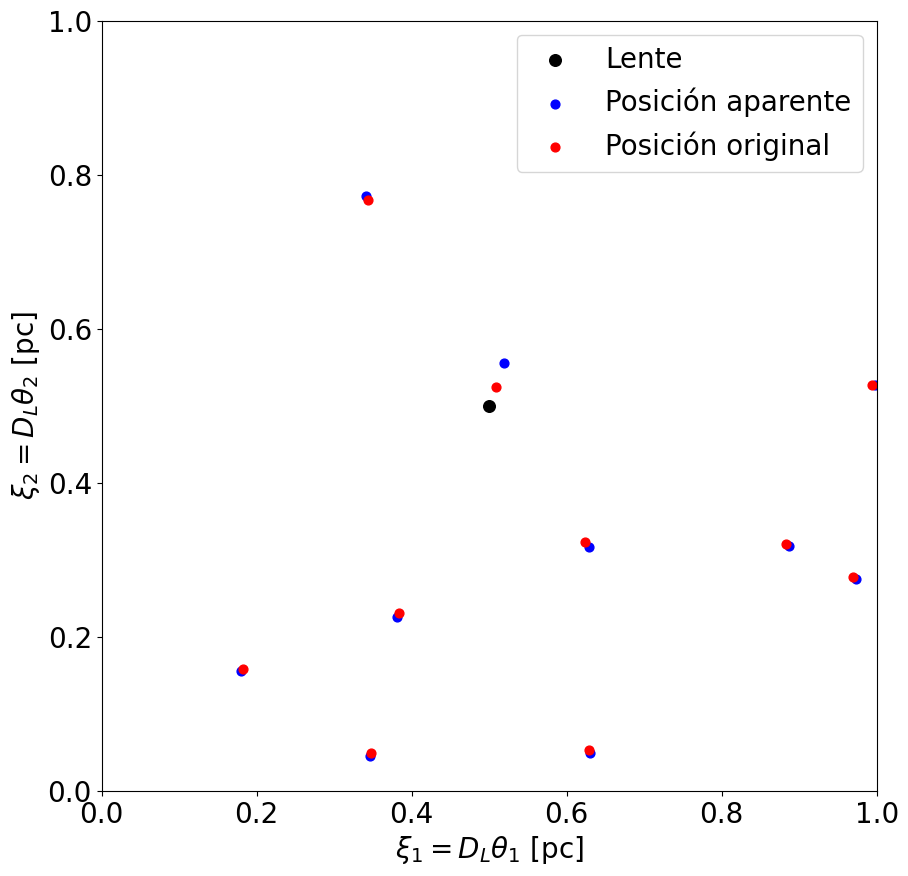

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rn
from astropy import constants as const
from astropy import units as u
from astropy.constants import G, M_sun, c

G_val = G.value  # m^3 / (kg s^2)
M_sun_val = M_sun.value  # kg
c_val = c.value  # m/s

ξ0_x=0.5
ξ0_y=0.5

m=const.M_sun.to('kg')*1.e10

lens_schwarzschild_radious = plt.Circle((ξ0_x,ξ0_y), 2*G_val*M_sun_val/c_val**2*u.m.to('pc'), color='red', fill=False, linestyle='--', label='Schwarzchild radius')
#plt.gca().add_artist(lens_schwarzschild_radious)

print(2*G_val*M_sun_val/c_val**2*u.m.to('pc'),2*G_val*M_sun_val/c_val**2)

nr=10
ξ_1r=rn.rand(nr)
ξ_2r=rn.rand(nr)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ξ1 = np.array([ξ_1r[i]-ξ0_x for i in range(nr)] )
ξ2 = np.array([ξ_2r[i]-ξ0_y for i in range(nr)] )

ξ=(ξ1**2+ξ2**2)*u.pc.to('m')

α1=4.0*const.G/const.c**2*(m/ξ*ξ1)
α2=4.0*const.G/const.c**2*(m/ξ*ξ2)

α1=np.array(α1)
α2=np.array(α2)

α=np.sqrt(α1**2+α2**2)

f=1#1.e-2/np.sqrt(al1**2+al2**2)

ax.scatter(ξ0_x,ξ0_y, color='black', label="Lente", s=70)
ax.scatter(ξ_1r,ξ_2r, color='blue', label="Posición aparente", s=40)
ax.scatter(ξ_1r-α1,ξ_2r-α2, color='red', label="Posición original", s=40)
#ax.quiver(ξ_1r, ξ_2r, α1*f, α2*f, color='r', scale=1)    

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.legend(fontsize=20)
ax.set_xlabel(r'$ξ_1=D_L\theta_1$ [pc]',fontsize=20)
ax.set_ylabel(r'$ξ_2=D_L\theta_2$ [pc]',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.set_title(f"Simple lens \n Mass: {m[0]/const.M_sun.to('kg')/1e10} x $10^{{10}} M_\odot$        Distance ($D_L$): 1pc{1*u.pc.to('m')/1e16:.4f} x $10^{{16}}$ m", fontsize=20)
plt.savefig("../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Lente_simple")

## Imágenes múltiples

En el trabajo hemos visto que la ecuación de la lente para una lente puntual se puede reescribir como

$$
    \beta = \theta - \frac{\theta_E{}^2}{\theta}.
$$

donde $\theta_E$ es el conocido como radio de Einstein y viene dado por

$$
\theta_E= \sqrt{\frac{4 G M}{c^2} \frac{D_{ds}}{D_s D_d}}
$$

Las soluciones de esta ecuación de segundo grado son las siguientes:

$$
    \boxed{\theta_{\pm}= \frac{1}{2} \left( \beta \pm \sqrt{\beta^2 + 4 \theta_E{}^2}\right)}.
$$

Si dividimos esta solución por $theta_E$ obtenemos

$$
    \boxed{x_{\pm}= \frac{1}{2} \left( y \pm \sqrt{y^2 + 4 }\right)}, 
$$

donde 

$$
   x= \frac{\theta}{\theta_E} \qquad y = \frac{\beta}{\theta_E}
$$

Por tanto, siempre que estemos en la aproximación de lente fina, un objeto puntual tendrá dos imágenes en los puntos $x_+$ y $x_-$.



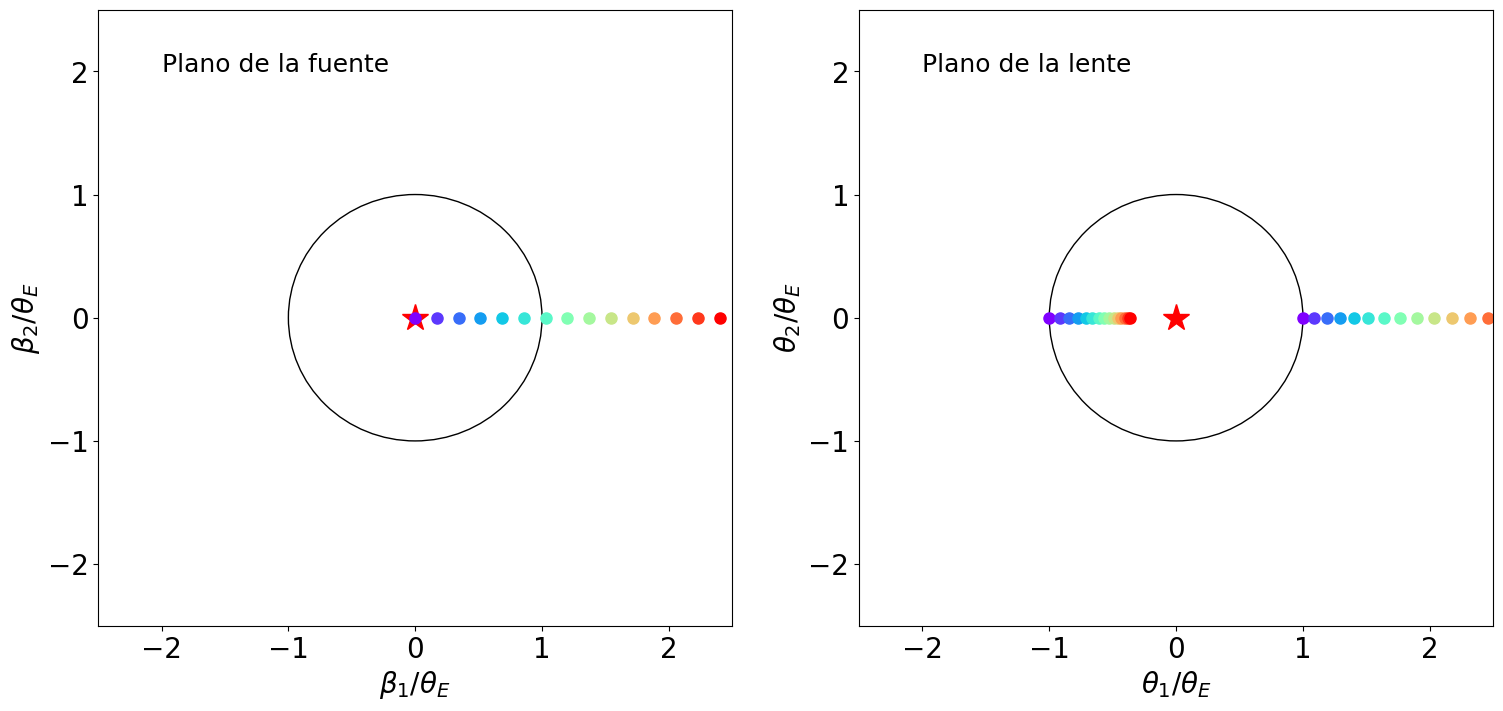

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm 

%matplotlib inline

M_lens=0.3 # solar masses
Dd=4.0 # kpc
Ds=8.0 # kpc
Dds=Ds-Dd
vel=200 # km/s
y0=1.0
t0=365.0 # days

theta_E=2*np.sqrt(M_lens*(Dds/Ds/Dd))

fig,ax=plt.subplots(1,2,figsize=(18,8))
circle=plt.Circle((0,0),1,color='black',fill=False)
circle_y=plt.Circle((0,0),1,color='black',fill=False)
ax[1].set_xlim([-2.5,2.5])
ax[1].set_ylim([-2.5,2.5])
ax[1].add_artist(circle)
ax[1].plot([0.0],[0.0],'*',markersize=20,color='red')
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

ax[0].set_xlim([-2.5,2.5])
ax[0].set_ylim([-2.5,2.5])
ax[0].add_artist(circle_y)
ax[0].plot([0.0],[0.0],'*',markersize=20,color='red')
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

beta_0=np.linspace(0,2.4,15)
beta_1=np.zeros(15)

theta1_0=0.5*(beta_0+np.sqrt(beta_0*beta_0+4))
theta1_1=np.zeros(15)

theta2_0=0.5*(beta_0-np.sqrt(beta_0*beta_0+4))
theta2_1=np.zeros(15)

color=iter(cm.rainbow(np.linspace(0,1,beta_0.size)))

for i in range(beta_0.size):
    c=next(color)
    ax[1].plot([theta1_0[i]],[theta1_1[i]],'o',markersize=8,color=c)
    ax[1].plot([theta2_0[i]],[theta2_1[i]],'o',markersize=8,color=c)
    ax[0].plot([beta_0[i]],[beta_1[i]],'o',markersize=8,color=c)
    
ax[1].text(-2,2,'Plano de la lente',fontsize=18)
ax[0].text(-2,2,'Plano de la fuente',fontsize=18)

ax[1].set_xlabel(r'$\theta_1  / \theta_E$',fontsize=20)
ax[1].set_ylabel(r'$\theta_2  / \theta_E$',fontsize=20)
ax[0].set_xlabel(r'$\beta_1  / \theta_E$',fontsize=20)
ax[0].set_ylabel(r'$\beta_2  / \theta_E$',fontsize=20)

fig.savefig('../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Multiples_imágenes_lente_puntual.png')

## Aumentos de brillo

Como el brillo superficial del objeto luminoso se conserva, los aumentos en el brillo ($\mu$) se dan como consecuencia del cambio entre el ángulo sólido antes y después del lenteo, esto es

\begin{equation}
    \mu=\frac{\theta}{\beta} \frac{d \theta}{d \beta}
\end{equation}

Lo que en el caso anterior de múltiples imágenes se traduce a

\begin{equation}
    \mu_{\pm}= \left[1- \left( \frac{\theta_E}{\theta_{\pm}}\right)^4\right]^{-1}=\frac{y^2+2}{2 y \sqrt{y^2+4}} \pm \frac{1}{2},
\end{equation}

donde $y= \beta /\theta_E$.

## Curvas de luz

Notebook concreto en el que se basa: https://github.com/maxmen/LensingLectures/blob/master/Notebooks/9_2020_microlensing_light_curve.ipynb.

Debido a los aumentos de brillo que hemos mencionado anteriormente, en un entorno dinámico, la intensidad superficial cambia a lo largo del tiempo $\mu=\mu(t)$. Así, un objeto de flujo intrínseco $f$ tendrá un flujo tras la lente de

\begin{equation}
    f(t)= \mu(t) f_s,
\end{equation}

Si consideráramos un objeto pasando tras la lente con una velocidad constante de $v$, tardará en cruzar la distancia del radio de Einstein un tiempo aproximado de 

\begin{equation}
    t_E=\frac{R_E}{v}=\frac{D_d \theta_E}{v}
\end{equation}

Asimismo, el ángulo que recorrerá a lo largo del tiempo 

\begin{equation}
    \theta_1(t)=\frac{t-t_0}{t_E}\theta_E,
\end{equation}

donde $t_0$ es el momento cuando el objeto se encuentra más cerca del centro, como se ve en la Fig. \ref{fig: Movimiento}.

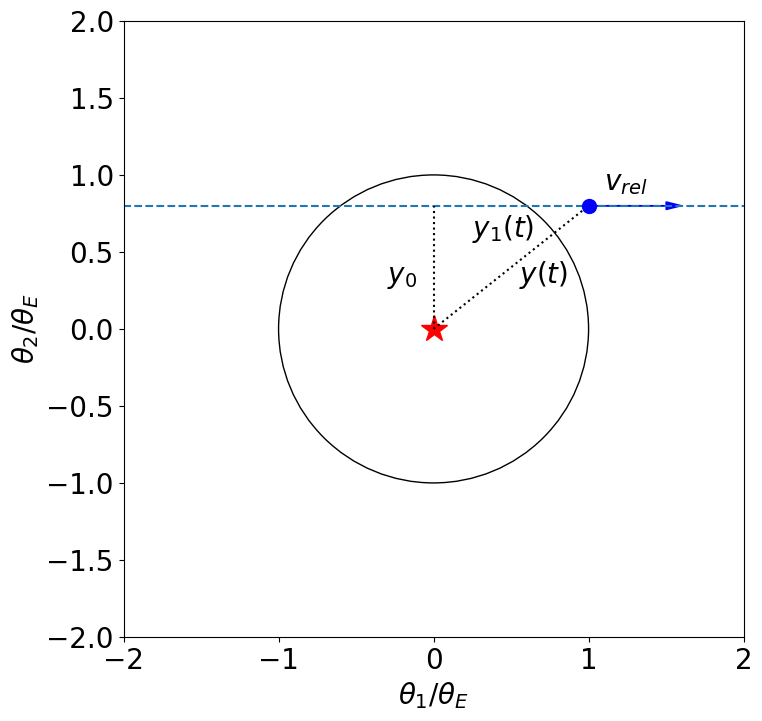

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
circle=plt.Circle((0,0),1,color='black',fill=False)
ax.set_xlim([-2.,2.])
ax.set_ylim([-2.,2.])
ax.add_artist(circle)
ax.plot([0.0],[0.0],'*',markersize=20,color='red')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

y2=[0.8,0.8]
y1=[-2.5,2.5]

ax.plot(y1,y2,'--')

x1=[0,0]
x2=[0,0.8]

ax.plot(x1,x2,':',color='black')
ax.text(-0.3,0.3,r'$y_0$',fontsize=20) 

x1=[0,1]
x2=[0,0.8]
ax.plot(x1,x2,':',color='black')
ax.plot([1],[0.8],'o',markersize=10,color='blue')
ax.text(0.55,0.3,r'$y(t)$',fontsize=20)
ax.text(0.25,0.6,r'$y_1(t)$',fontsize=20)
ax.text(1.1,0.9,r'$v_{rel}$',fontsize=20)
ax.arrow(1, 0.8, 0.5, 0, head_width=0.05, head_length=0.1, fc='blue', ec='blue',color='blue')
    
#ax[0].text(-2,2,'Lens plane',fontsize=18)
#ax[1].text(-2,2,'Source plane',fontsize=18)

ax.set_xlabel(r'$ \theta_1 / \theta_E$',fontsize=20)
ax.set_ylabel(r'$ \theta_2 / \theta_E$',fontsize=20)

fig.savefig('../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Movimiento.png')


Resulta que la distancia angular del objeto a la lente 

\begin{equation}
    |\vec u(t)|=\frac{|\vec\theta (t)|}{
\theta_E}= \frac{\sqrt{\theta_0^2+\theta_1^2(t)}}{\theta_E}=\sqrt{y_{min}^2+\frac{(t-t_0)^2}{t_E^2}},
\end{equation}

donde $u_{min}=\frac{\theta_0}{\theta_E}$, es decir, es el parámetro angular de impacto o en otras palabras, la fracción del ángulo de Einstein que forman el punto más cercano de la trayectoria con la lente como se observa en la Fig \ref{fig: Ilustraciones de las trayectorias y amplificaciones en las microlentes}.

\begin{equation}
    \mu(t)=|\mu_+|+|\mu_-|=\frac{y(t)^2+2}{y(t) \sqrt{y(t)^2+4}}
\end{equation}

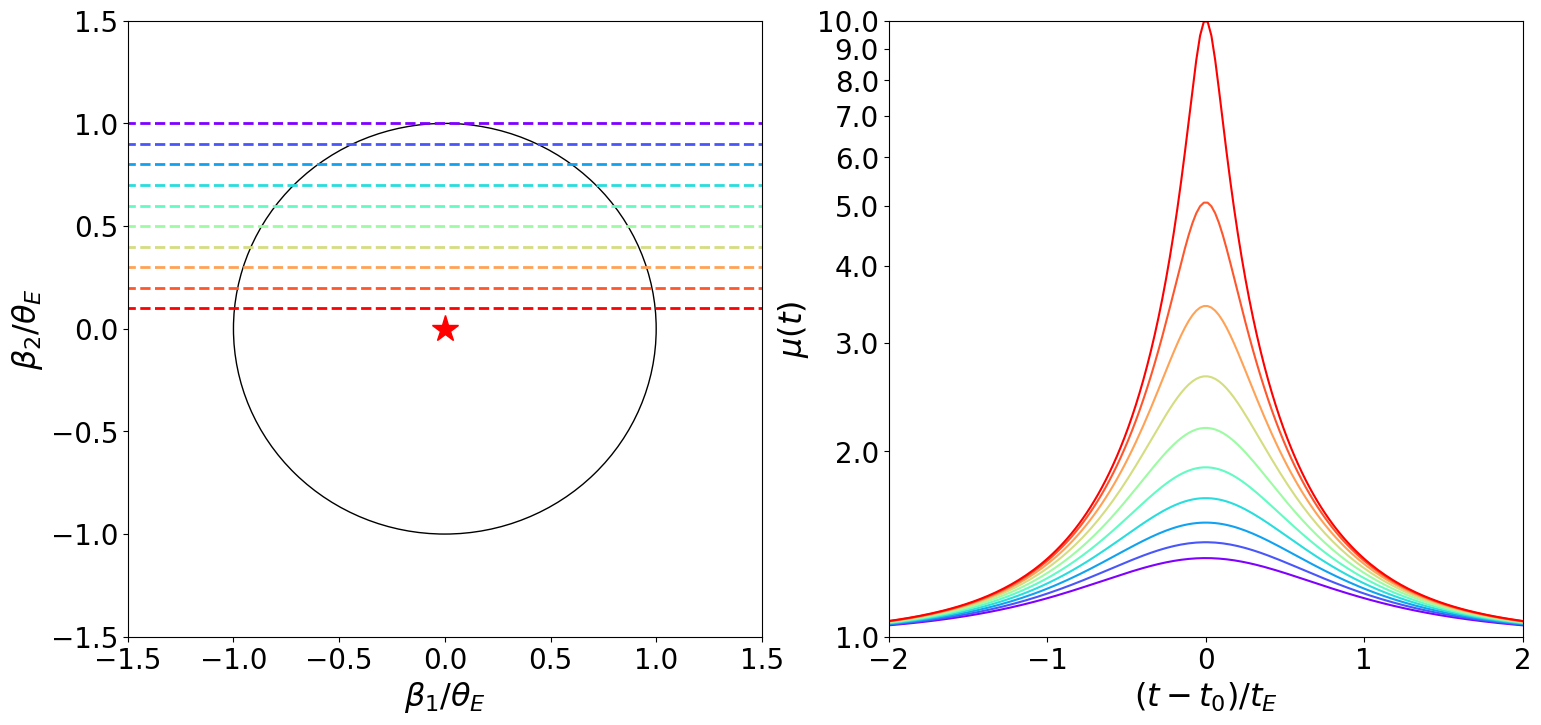

In [2]:
# import the usual stuff

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker

%matplotlib inline

# our problem can be phrased as this: given a lens with a given mass M and placed 
# at a given distance D_L, we want to compute the magnification of a source moving a velocity 
# v on a plane at distance D_S, knowing that the source passes at a minimal distance y0 from
# the lens at the time t0. 

def mut_func(M,DL,DS,v,y0,t0,t):
    y=yt(M,DL,DS,v,y0,t0,t)
    return ((y**2+2)/y/np.sqrt(y**2+4))

def yt(M,DL,DS,v,y0,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return (np.sqrt(y0**2+((t-t0)/tE)**2))

def EinsteinCrossTime(M,DL,DS,v):
    theta_e=theta_e_func(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/v/u.km*u.s).to('day'))

def theta_e_func(M,DL,DS):
    mass=M*const.M_sun#.value
    G=const.G#.value
    c=c=const.c#.value
    aconv=180.0*3600.0/np.pi*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)


t=np.linspace(0,730,1600)
M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=200 # km/s
y0=1.0
t0=365.0 # days

xx=[-2,2]
mut=mut_func(M_lens,DL,DS,vel,y0,t0,t)

theta_einst=theta_e_func(M_lens,DL,DS)
t_einst=EinsteinCrossTime(M_lens,DL,DS,vel)

y0=np.linspace(1.0,0.1,10)

fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[1].set_ylim([1.0,10.0])
ax[1].set_xlim([-2,2])
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$(t-t_0)/t_E$',fontsize=23)
ax[1].set_ylabel(r'$\mu(t)$',fontsize=23)
ax[1].set_yticks(np.arange(1, 11, 1.0))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

circle=plt.Circle((0,0),1,color='black',fill=False)
ax[0].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,1.5])
ax[0].add_artist(circle)
ax[0].plot([0.0],[0.0],'*',markersize=20,color='red')
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

from matplotlib.pyplot import cm 
color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

for i in range(y0.size):
    c=next(color)
    mut=mut_func(M_lens,DL,DS,vel,y0[i],t0,t)
    ax[1].plot((t-t0)/t_einst,mut,'-',color=c)
    yy=[y0[i],y0[i]]
    ax[0].plot(xx,yy,'--',color=c,lw=2)

ax[0].set_xlabel(r'$ \beta_1 / \theta_E$',fontsize=23) 
ax[0].set_ylabel(r'$ \beta_2 / \theta_E$',fontsize=23)

fig.savefig('../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Curvas_de_luz.png')

A continuación Meneghetti hace dos clases para la fuente luminosa puntual y otra para la lente puntual: point_source y point_lens


La primera contiene la distancia a la fuente (ds), el flujo (flux) y la velocidad (vel).

La segunda contiene la masa de la lente (mass), distancia a la lente (dl), la fracción de la distancia angular mínima en unidades del radio de Einstein (y0), tiempo en la distancia mínima (t0) y tiempo de Einstein (t_E), la cual se ha definido anteriormente en este capítulo. Además, recoge tembién los datos de una fuente.

In [3]:
from astropy import constants as const 
from astropy import units as u
import numpy as np

class point_source(object):
    
    def __init__(self,flux=1.0,ds=10.0,vel=200.):
        """
        Initialize a point source.
        Parameters:
        - flux: baseline flux
        - ds: source distance
        - ds: source relative velocity
        """
        self.ds=ds
        self.flux=flux
        self.vel=vel
        
class point_lens(object):

    """ 
    Initialize a point lens.
    Parameters:
    - ps : point source
    - mass : lens mass
    - dl : lens distance
    - t0 : time of minimal distance from the source
           (magnification peak)
    - y0 : impact parameter
    """
    def __init__(self,ps,mass=1.0,dl=5.0,ds=8.0,t0=0.0,y0=0.1):
        self.M=mass
        self.dl=dl
        self.ps=ps
        self.y0=y0
        self.t0=t0
        self.tE=self.EinsteinCrossTime()
        
###################################################################        
    # a function returning the Einstein radius
    def EinsteinRadius(self):
        mass=self.M*const.M_sun
        G=const.G
        c=const.c
        # conversion factor: radian to arcsec 
        aconv=np.rad2deg(1.0)*3600.0*u.arcsecond 
        return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(self.ps.ds-self.dl)
                        /self.dl/self.ps.ds/u.kpc))*aconv)
    
    # a function returning the Einstein radius crossing time
    def EinsteinCrossTime(self):
        theta_e=self.EinsteinRadius()
        return(((theta_e.to('radian').value*self.dl*u.kpc).to('km')
                /self.ps.vel/u.km*u.s).to('day'))
    
    # a function returning the coordinates of the unlensed source 
    # at time t
    def y(self,t):
        y1=(t-self.t0)/self.tE.value
        y0=np.ones(len(t))*self.y0
        return(y0,y1)

    # the lens magnification as a function of time
    def mut(self,t):
        y0,y1=self.y(t)
        y=np.sqrt(y0**2+y1**2)
        return (self.ps.flux*(y**2+2)/y/np.sqrt(y**2+4))
    
    # a function returning the coordinates of the unlensed source 
    # at time t
    def y(self,t):
        y1=(t-self.t0)/self.tE.value
        y2=np.ones(len(t))*self.y0
        return(y1,y2)

    # a function returning the coordinates of the x_+ image at time t
    def xp(self,t):
        y1, y2  = self.y(t)
        Q = np.sqrt(y1**2 + y2**2 +4)/(np.sqrt(y1**2 + y2**2))
        xp1= 0.5 * (1 + Q) * y1
        xp2= 0.5 * (1 + Q) * y2
        return(xp1, xp2)
    
    # a function retruning the coordinates of the x_- image at time t
    def xm(self,t):
        y1, y2  = self.y(t)
        Q = np.sqrt(y1**2 + y2**2 +4)/(np.sqrt(y1**2 + y2**2))
        xm1= 0.5 * (1 - Q) * y1
        xm2= 0.5 * (1 - Q) * y2
        return(xm1, xm2)
    
    # the magnification of the x_+ image
    def mup(self,t):
        y1, y2  = self.y(t)
        yy=np.sqrt(y1**2+y2**2)
        mup=0.5*(1+(yy**2+2)/yy/np.sqrt(yy**2+4))
        return (mup)
    
    # the magnification of the x_- image
    def mum(self,t):
        y1, y2  = self.y(t)
        yy=np.sqrt(y1**2+y2**2)
        mum=0.5*(1-(yy**2+2)/yy/np.sqrt(yy**2+4))
        return (mum)
    
    # a function returning the coordinate of the light centroid
    def xc(self,t):
        xp=self.xp(t)
        xm=self.xm(t)
        xc=(xp*np.abs(self.mup(t))+
            xm*np.abs(self.mum(t)))/(np.abs(self.mup(t))+np.abs(self.mum(t)))
        return (xc)

    def xp_ext_source(self,t,r):
        phi=np.linspace(0.0,2*np.pi,360)
        dy1=r*np.cos(phi)
        dy2=r*np.sin(phi)
        y1,y2=self.y(t)
        yy1=y1+dy1
        yy2=y2+dy2
        Q=np.sqrt(yy1**2+yy2**2+4.0)/np.sqrt(yy1**2+yy2**2)
        xp1=0.5*(1+Q)*yy1
        xp2=0.5*(1+Q)*yy2
        return(xp1,xp2)   
    
    def xm_ext_source(self,t,r):
        phi=np.linspace(0.0,2*np.pi,360)
        dy1=r*np.cos(phi)
        dy2=r*np.sin(phi)
        y1,y2=self.y(t)
        yy1=y1+dy1
        yy2=y2+dy2
        Q=np.sqrt(yy1**2+yy2**2+4.0)/np.sqrt(yy1**2+yy2**2)
        xm1=0.5*(1-Q)*yy1
        xm2=0.5*(1-Q)*yy2
        return(xm1,xm2)
    
    def deltaxc(self,t):
        y1,y2=self.y(t)
        yy=(y1**2+y2**2)
        return(y1/(yy+2),y2/(yy+2))

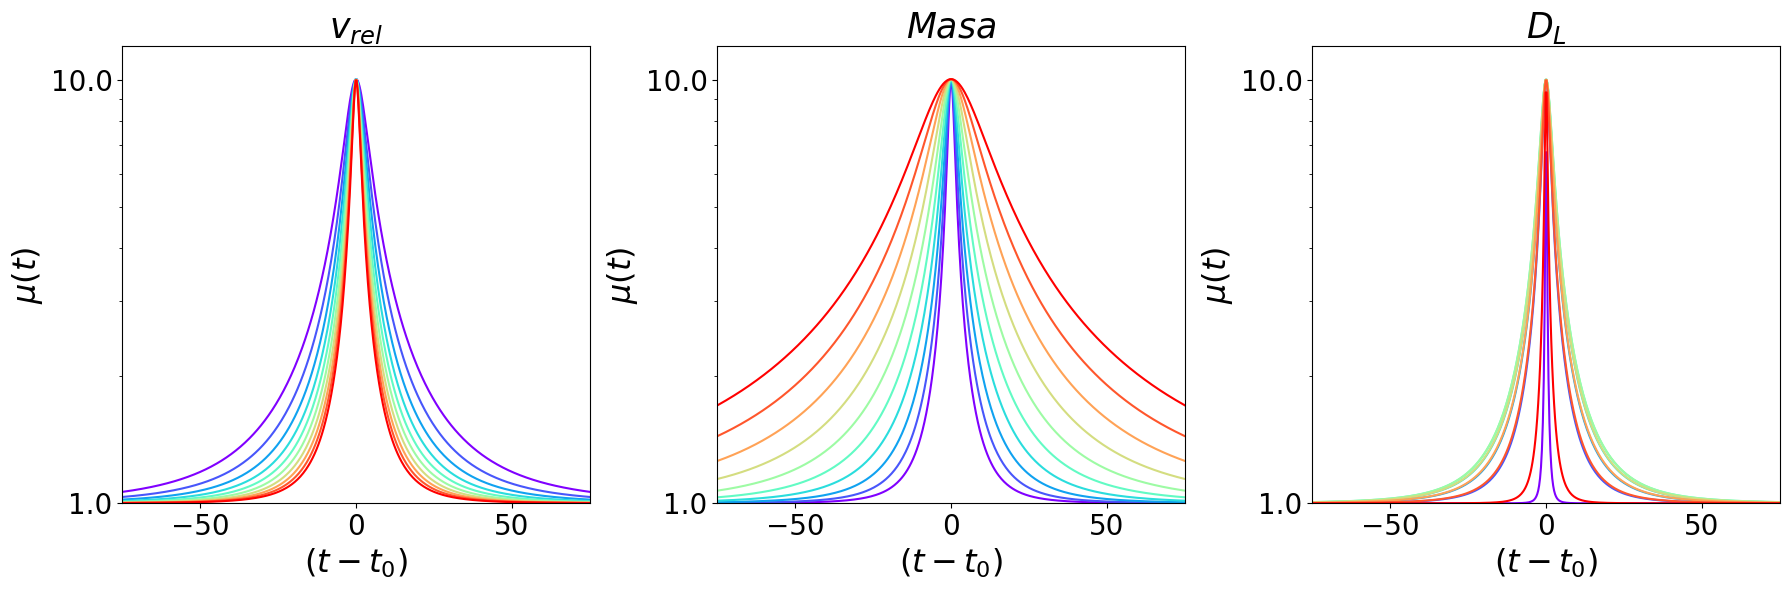

In [11]:
v_test=np.linspace(100.0,300.0,10)
M_test=np.logspace(-1,1,10)
d_test=np.linspace(0.01,8.0*0.99,10)


t=t0+np.linspace(-75,75,500)

fig,ax=plt.subplots(1,3,figsize=(18,6))

color=iter(cm.rainbow(np.linspace(0,1,v_test.size)))
for i in range(len(v_test)):
    ps = point_source(flux=1.,ds=8.0,vel=v_test[i])
    pl = point_lens(ps,mass=0.3,dl=4.0,t0=t0,y0=y0.min())
    t_=(t-t0)
    c=next(color)
    mut=pl.mut(t)
    ax[0].plot(t_,mut,'-',color=c)
    ax[0].set_title(r'$v_{rel}$',fontsize=25)
    
color=iter(cm.rainbow(np.linspace(0,1,v_test.size)))
ps = point_source(flux=1.,ds=8.0,vel=200)
for i in range(len(M_test)):
    pl = point_lens(ps,mass=M_test[i],dl=4.0,t0=t0,y0=y0.min())
    t_=(t-t0)
    c=next(color)
    mut=pl.mut(t)
    ax[1].plot(t_,mut,'-',color=c)
    ax[1].set_title(r'$Masa$',fontsize=25)
    
color=iter(cm.rainbow(np.linspace(0,1,v_test.size)))
for i in range(len(d_test)):
    pl = point_lens(ps,mass=0.3,dl=d_test[i],t0=t0,y0=y0.min())
    t_=(t-t0)
    c=next(color)
    mut=pl.mut(t)
    ax[2].plot(t_,mut,'-',color=c)
    ax[2].set_title(r'$D_{L}$',fontsize=25)        

for i in range(3):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_yticks(np.arange(1, 11, 1.0))
    ax[i].set_xlabel(r'$(t-t_0)$',fontsize=23)
    ax[i].set_ylabel(r'$\mu(t)$',fontsize=23)
    ax[i].set_ylim([1.0,12.0])
    ax[i].set_xlim([t.min()-t0,t.max()-t0])
    ax[i].set_yscale('log')
    ax[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    
plt.tight_layout()
plt.savefig("../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Curvas de luz otros parámetros.png")


El segundo es el método astronométrico de microlenteo. Este consiste en calcular la posición del objeto luminoso en busca de diferencias en la posición. Durante el evento de una microlente, la posición de los puntos amplificados cambia a lo largo del tiempo. Lo que hace que la posición del centroide (Ec. \ref{ec: centroide}) varíe. El centroide se define como

\begin{equation}
    \vec{\theta_c}= \frac{\int I(\vec \theta) \vec\theta d^2 \theta}{\int I(\vec\theta) d^2\theta}.
\end{equation}

En las lentes puntuales su valor está dado por

\begin{equation}
    \vec\theta_c=\frac{\vec{\theta}_+ |\mu_+|+\vec\theta_- |\mu_-|}{|\mu_+|+|\mu_-|},
\end{equation}

donde $\vec\theta_\pm$ son las soluciones de la Ec de múltiples imágenes y $|\mu_\pm|$ son los valores absolutos de las magnitudes para cada una de las imágenes.\\

Tras sustituir cada una de las expresiones y utilizar la expresión de $u(t)$ que hemos calculado en la Sec. \ref{subsubsec: Curvas de luz} obtenemos

\begin{equation}
    \delta \vec\theta_c= (\vec\theta_c- \vec\theta)=\frac{\vec y(t)}{y(t)^2+2} \theta_E \implies \vec x_c = \frac{\vec y(t)}{y(t)^2+2}
\end{equation}

Los siguientes códigos se basan en el Notebook [Notebook 12](https://github.com/maxmen/LensingLectures/blob/master/Notebooks/.ipynb_checkpoints/12_2018-checkpoint.ipynb)

C:\Users\User\AppData\Local\Temp\ipykernel_24068\861649120.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=14)


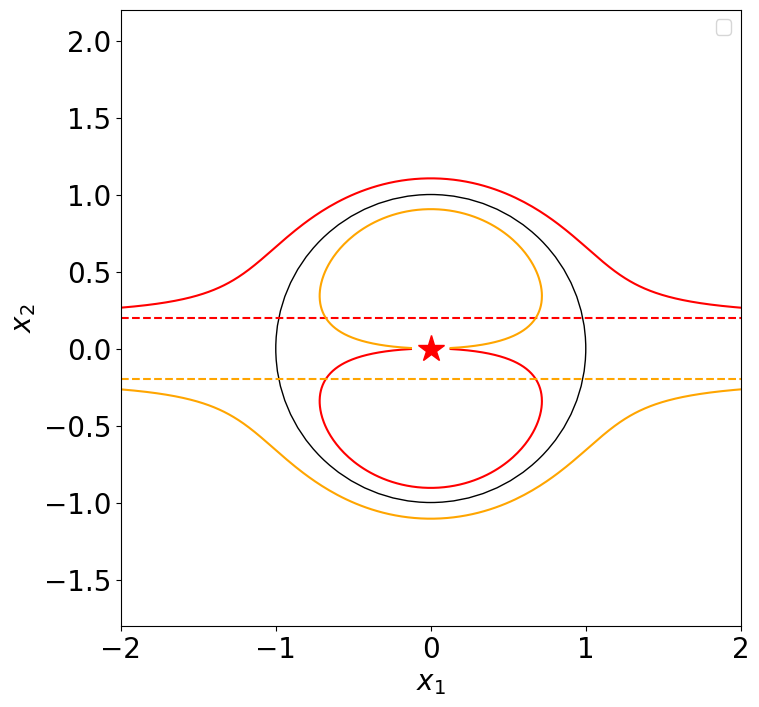

In [5]:
t = np.linspace(-300,300,2000)
ps = point_source()
pl = point_lens(ps=ps, mass=1.0, dl=5.0, y0 = 0.2)
y1, y2 = pl.y(t)
xp1, xp2= pl.xp(t)
xm1,xm2=pl.xm(t)
xc1,xc2=pl.xc(t)

%matplotlib inline
fig, ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(y1, y2, '--', color="red")
ax.plot(xp1, xp2, color="red")
ax.plot(xm1, xm2, color="red")
ax.plot(y1, -y2, '--', color="orange")
ax.plot(xp1, -xp2, color="orange")
ax.plot(xm1, -xm2, color="orange")
#ax.plot(xc1,xc2, '-')

ax.plot([0],[0],'*',markersize=20, color='red')
circle=plt.Circle((0,0),1,color='black',fill=False)
ax.add_artist(circle)
ax.set_xlim([-2,2])
ax.set_ylim([-1.8,2.2])
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel(r'$x_{1}$',fontsize=20)
ax.set_ylabel(r'$x_{2}$',fontsize=20)

plt.savefig("../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Trayectorias_de_las_imágenes.png")


En la siguiente figura se asume que la fuente es un círculo de radio r en la posición $\vec y$, la cual se puede entender como una colección de puntos a distancias 
$$
\vec y+d\vec y_i
$$
donde 
$$
d\vec{y}_i=r(\cos \phi,\sin \phi)
$$
y $\phi \in [0,2\pi)$.

Cada uno de estos puntos de la fuente produce dos imágenes en las posiciones que hemos definido anteriormente $\vec x_{i,+}$ y $\vec x_{i,-}$. De esta manera se obtiene la imágen distorsionada de esta fuente de luz

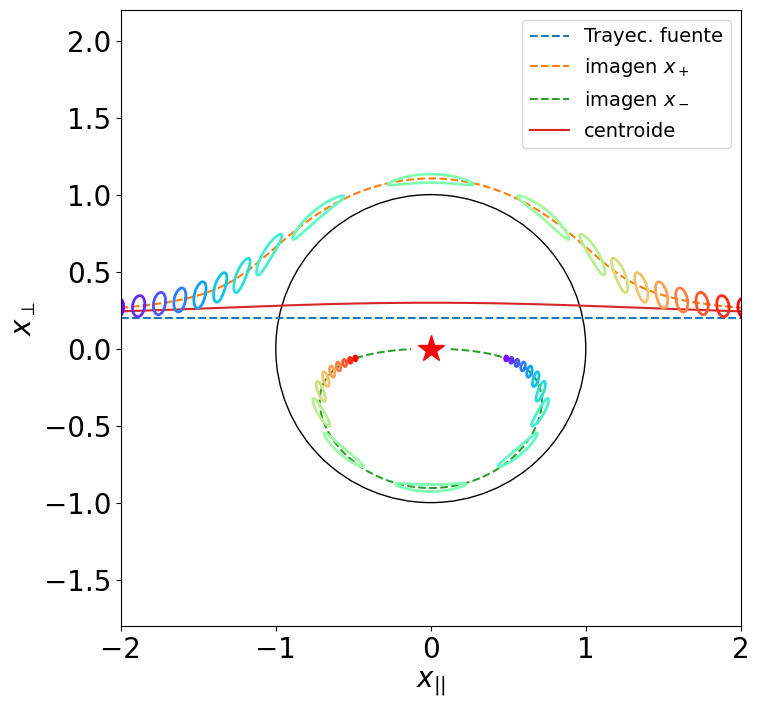

In [6]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(y1,y2,'--',label='Trayec. fuente')
ax.plot(xp1,xp2,'--',label='imagen $x_+$')
ax.plot(xm1,xm2,'--',label='imagen $x_-$')
ax.plot(xc1,xc2,label='centroide')


t_sparse=np.linspace(-60,60,19)
from matplotlib.pyplot import cm 
color=iter(cm.rainbow(np.linspace(0,1,t_sparse.size)))
for tt in t_sparse:
    c=next(color)
    xp1_e,xp2_e=pl.xp_ext_source(np.array([tt]),0.05)
    ax.plot(xp1_e,xp2_e,color=c,lw=2)
    xm1_e,xm2_e=pl.xm_ext_source(np.array([tt]),0.05)
    ax.plot(xm1_e,xm2_e,color=c,lw=2)
    
ax.set_xlim([-2,2])
ax.set_ylim([-1.8,2.2])
ax.plot([0.0],[0.0],'*',markersize=20,color='red')
circle=plt.Circle((0,0),1,color='black',fill=False)
ax.add_artist(circle)
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel(r'$x_{||}$',fontsize=20)
ax.set_ylabel(r'$x_\perp$',fontsize=20)

plt.savefig("../../Multimedia/Massimo_Meneghetti/Lente_Puntual/Imegen_de_una_fuente_circular.png")